In [6]:
import sys
sys.path.append('/Users/kelly/koskella_lab')
from tools import *
import plotly.express as px

In [4]:
df = pd.read_csv('/Users/kelly/Downloads/KH_RBG2_02122025.csv')
df = clean_and_transpose(df, 33, 131)
df1 = df.copy()

In [33]:
def plot_timeseries_interactive(dataframe, title=None, legend_title="Series"):
    fig = px.scatter(dataframe, x=dataframe.index, y=dataframe.columns,
                     labels={'index': 'Time (hr)', 'value': 'OD reading', 'Series': legend_title},
                     title=title, color_discrete_sequence=px.colors.qualitative.Pastel)
    fig.update_traces(marker=dict(size=7))
    fig.show()
    
plot_timeseries_interactive(df, 'Combined Growth Curve')

In [35]:
#plot_timeseries(df, 'Combined Growth Curve')
clean_df = remove_outliers(df, 1)
#plot_timeseries(clean_df, 'Combined Growth Curve')
plot_timeseries_interactive(clean_df, 'Combined Growth Curve - outliers removed')

In [18]:
#split into 4 tables of technical replicates
table_1 = df.filter(regex=r'^[A-H][1-3]$') 
table_2 = df.filter(regex=r'^[A-H][4-6]$')
table_3 = df.filter(regex=r'^[A-H][7-9]$')
table_4 = df.filter(regex=r'^[A-H](10|11|12)$')

table_arr = [table_1, table_2, table_3, table_4]
avg_tables = []

#average every 3 wells
for df in table_arr:
    avg_df = df.groupby(df.columns.str[0], axis=1).mean()
    avg_tables.append(avg_df)

In [34]:
for i in range(1, 5):
    plot_timeseries_interactive(avg_tables[i-1], f'Biological Replicate - {i}', 'Technical Replicates')

For all the graphs, its like the B line (10 PFU i think) does grow at lower concentration - the yellow line is generally the lowest line, but then after that the more phage you add the more its helping the bacteria. All the H lines are the best growers. Just think that is cool. Funny

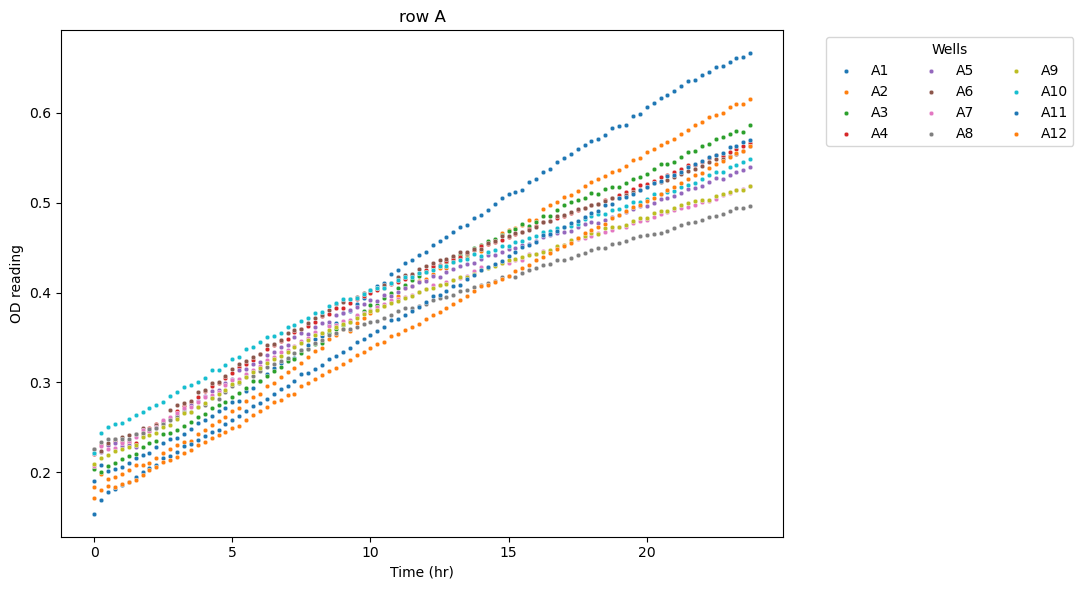

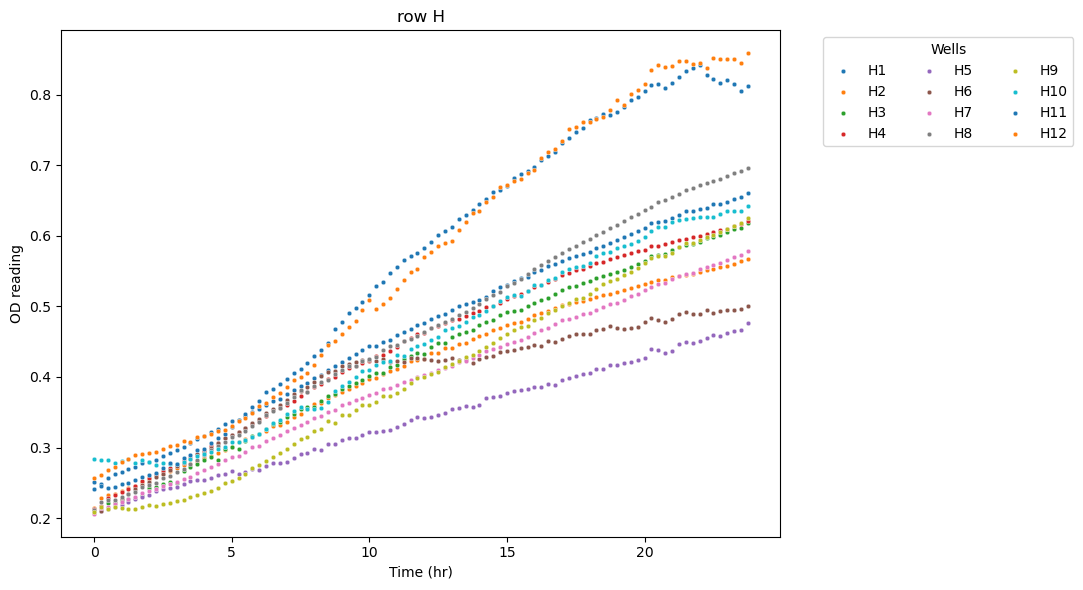

In [6]:
#plot all the As and Hs

table_A = df1.filter(regex=r'^A')
table_H = df1.filter(regex=r'^H')

plot_timeseries(table_A, 'row A', 'Wells')
plot_timeseries(table_H, 'row H', 'Wells')